## Simplificar flujos de trabajos con pipelines

El concepto de los _pipelines_ es muy sencillo de entender: ajustar varios pasos de transformacion, uno seguido de otro, de tal manera que todos los pasos individuales se condencen en un solo paso global.

Pra esta parte trabajaremos con el archivo `Breast Cancer Wisconsin` del cual se puede obtener informacion desde la pagina web: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

df.columns = ['ID', 'Diagnosis']+ list(np.arange(1, 31))
df.head()

,ID,Diagnosis,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [12]:
le.transform(['M', 'B'])

array([1, 0], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [32]:
# Usando pipelines para combinar procesos: escalamiento, PCA, modelado de datos
# =============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print(f'Test Accuracy: {np.round(pipe_lr.score(X_test, y_test), 4)}')

Test Accuracy: 0.9561


IMPORTANTE: La funcion `make_pipeline` puede tomar un numero arbitrario de transformadores de scikit learn (objetos que soportan `fit` y `transform` como entrada) seguido de un estimador de scikit learn que implemente los metodos `fit` y `predict`. El estimador siempre debe ir al final, y siempre debe existir.

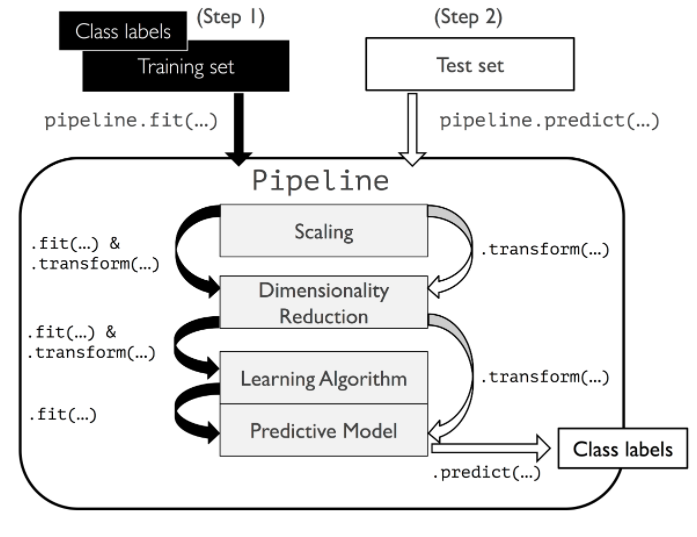

<div class="burk">
EJERCICIO</div><i class="fa fa-lightbulb-o "></i>

Utilice los datos anteriores junto con el pipeline generado para realizar la prediccion de los datos y evaluar el rendimiento de los conjuntos de entrenamiento y test.

## Utilizar validacion cruzada de K iteraciones paramejorar el rendimiento del modelo

El objetivo de esta tecnica es generar estimaciones fiables para la generalizacion del modelo a datos no vistos durante el entrenamiento, buscando evitar el subajuste y el sobreajuste.

En esta tecnica, se divide aleatoriamente el conjunto de datos de entrenamiento en k iteraciones sin reemplazo, donde k-1 iteraciones se utilizan para el entrenamiento del modelo y una iteracion para la evaluacion del rendimiento. Este proceso se repite k veces para obtener k modelos y estimaciones del rendimiento. 

Despues calculamos el rendimiento medio de los modelos basado en distintas e independientes iteraciones para obtener una estimacion del rendimiento que es menos sensible a la subdivision de datos. Esta tecnica se usa generalmente para la seleccion de modelos, es decir. la eleccion optima de los hiperparametros para el modelo.

Una vez se han encontrado los valores optimos de los hiperparametros, se puede volver a entrenar el modelo en el conjunto de entrenamiento completo y obtener una estimacion del rendimiento final mediante el conjunto de prueba independiente. Lo anterior se basa en el hecho de que proporcionar mas datos de entrenamiento a un modelo lo vuelva mas robusto y preciso.

El siguiente ejemplo se basa en una estimacion con k=10. El conjunto de entrenamiento esta dividido en 10 iteraciones, 9 para entrenar y 1 para evaluar el rendimiento. Ademas los rendimientos $E_i$ para cada iteracion se utilizan para calcular el rendimiento estimado medio del modelo:

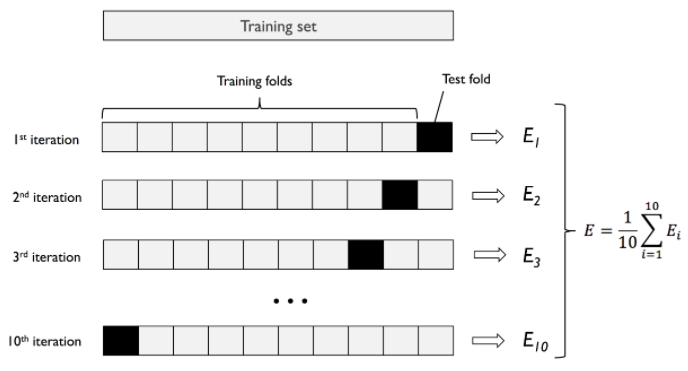

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(f'Preciciosnes del modelo CV: {scores}')
print(f'Precision del modelo CV: {np.round(np.mean(scores), 4)} +/- {np.round(np.std(scores), 4)}')

Preciciosnes del modelo CV: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
Precision del modelo CV: 0.9495 +/- 0.0139


In [42]:
scores = cross_val_score(estimator = pipe_lr, X = X_test, y = y_test, cv = 10, n_jobs = -1)
print(f'Preciciosnes del modelo CV: {scores}')
print(f'Precision del modelo CV: {np.round(np.mean(scores), 4)} +/- {np.round(np.std(scores), 4)}')

Preciciosnes del modelo CV: [1.         0.91666667 0.91666667 0.91666667 1.         1.
 0.90909091 0.90909091 1.         1.        ]
Precision del modelo CV: 0.9568 +/- 0.0433


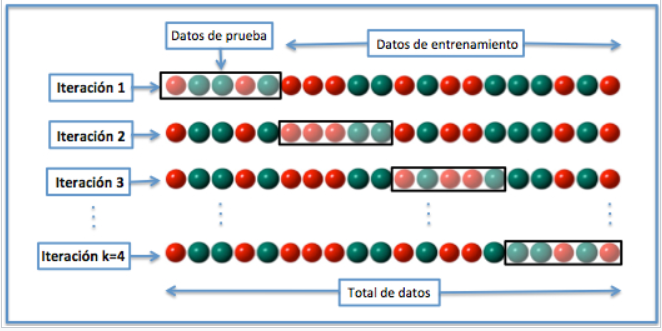

https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada#:~:text=La%20validaci%C3%B3n%20cruzada%20o%20cross,datos%20de%20entrenamiento%20y%20prueba.